In [1]:
import numpy as np
import geopandas as gp
import pandas as pd
import datetime as dt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit

# import .py scripts from repo 
from json_to_csv import geojson_to_csv
from ts_train_test_split import uni_selection

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

In [5]:
locations = pd.read_csv('Final_validation.csv', index_col=0)
locations

,lat,lon,Place,p,d,q,P,D,Q,filepath,MSE,r2
0,49.0362,-122.3247,"Abbotsford, Canada",1,0,8,2,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003737,0.563818
1,49.0362,-118.4245,"Grand Forks, Canada",1,0,0,1,0,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003181,0.631988
2,48.9289,-117.8306,"Northport, WA",1,0,2,0,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003246,0.732744
3,48.7835,-122.3357,"Dewey, WA",7,0,5,0,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003064,0.662395
4,48.7826,-121.7994,"Mt. Baker, WA",4,0,6,0,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003416,0.611871
5,48.5767,-122.9509,"Shaw Island, WA",7,0,5,0,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003064,0.662395
6,48.5085,-117.3252,"Rudy, WA",8,0,6,1,0,2,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003330,0.725801
7,48.4093,-123.5716,"Metchosin, Canada",7,0,5,0,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003064,0.662395
8,48.0139,-123.4453,"Port Angeles, WA",2,0,1,0,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003071,0.661566
9,47.9735,-122.2038,"Everett, WA",7,0,8,1,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003160,0.607775


In [6]:
def forecast(locations, sample):
    '''use pd.read_csv('Locations.csv') to access required data.
    Sample must be integer index of desired location.
    inputs hyperparameters and fits model'''

    forecasted = []
    geojson = locations['filepath'][sample]
    df = geojson_to_csv(geojson)
    X = uni_selection(df)
    X.index = pd.DatetimeIndex(X.index.values,
                                     freq=X.index.inferred_freq)
    (p, d, q) = (locations['p'][sample],
                 locations['d'][sample], locations['q'][sample])
    (P, D, Q, s) = (locations['P'][sample],
                    locations['D'][sample], locations['Q'][sample], 12)
    model = SARIMAX(X, order=(p, d, q), seasonal_order=(P, D, Q, s))
    fit_model = model.fit(maxiter=50, method='powell', disp=False)
    #model = SARIMAX()
    forecast = fit_model.get_prediction(start='2021-01-01', end='2035-12-01') 
    ci = forecast.conf_int()

    forecasted.append(forecast.predicted_mean)
    forecasts = pd.DataFrame(forecasted).T
    forecasts = forecasts.rename(columns = {'predicted_mean':'value'})
    real = pd.DataFrame(X)
    real = real.rename(columns = {'ALLSKY_KT':'value'})
    results = pd.concat([real, forecasts])
    results = results.rename(columns={'value':'solar'})
    return results


In [7]:
walla = forecast(locations, sample=25)

In [8]:
np.shape(walla)

(624, 1)

In [79]:
if np.shape(walla) == (624, 1):
    print('True')

True


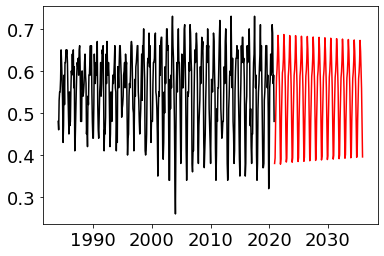

In [9]:
plt.plot(walla[:443], color='black')
plt.plot(walla[443:], color='red')

In [71]:
def forecast_all(locations):
    '''use pd.read_csv('Locations.csv') to access required data.
    Sample must be integer index of desired location.
    inputs hyperparameters and fits model'''
    mega = pd.DataFrame()
    
    for row in range(len(locations)):
        forecasted = []
        geojson = locations['filepath'][row]
        df = geojson_to_csv(geojson)
        X = uni_selection(df)
        X.index = pd.DatetimeIndex(X.index.values,
                                         freq=X.index.inferred_freq)
        (p, d, q) = (locations['p'][row],
                     locations['d'][row], locations['q'][row])
        (P, D, Q, s) = (locations['P'][row],
                        locations['D'][row], locations['Q'][row], 12)
        model = SARIMAX(X, order=(p, d, q), seasonal_order=(P, D, Q, s))
        fit_model = model.fit(maxiter=50, method='powell', disp=False)
        #model = SARIMAX()
        forecast = fit_model.get_prediction(start='2021-01-01', end='2035-12-01') 
        ci = forecast.conf_int()

        forecasted.append(forecast.predicted_mean)
        forecasts = pd.DataFrame(forecasted).T
        forecasts = forecasts.rename(columns = {'predicted_mean':'value'})
        real = pd.DataFrame(X)
        real = real.rename(columns = {'ALLSKY_KT':'value'})
        results = pd.concat([real, forecasts])
        results = results.rename(columns={'value':'solar'})
        mega = pd.concat([results], axis=1, keys=[locations['Place'][row]])
    mega.columns = mega.columns.droplevel(1)
    return mega

In [72]:
hereitgoes = forecast_all(locations)

/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/cbenstead/miniconda3/envs/SERF/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [73]:
hereitgoes

,"Portland, OR"
1984-01-01,0.480000
1984-02-01,0.380000
1984-03-01,0.480000
1984-04-01,0.480000
1984-05-01,0.520000
...,...
2035-08-01,0.580608
2035-09-01,0.522805
2035-10-01,0.484863
2035-11-01,0.409827
